In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler
from sklearn.metrics import classification_report
from utils import create_param_list, create_train_data_hold_out, create_train_data_CV, inference
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

torch.manual_seed(3407)

In [2]:
Q = 6
nconf = 81
ndata = 500
L = 64
T_cr_1 = 0.701 # critical temp for 2d clock
T_cr_2 = 0.898 # critical temp for 2d clock
t_start = 0.4
exclude_T = (0.65, 0.76, 0.84, 0.95)

prm_list, t_end = create_param_list(nconf=nconf, t_start=t_start, L=L, model_name="2d_Clock", q=Q)
# print(prm_list)
print(f"データ数:{nconf*ndata}")

データ数:40500


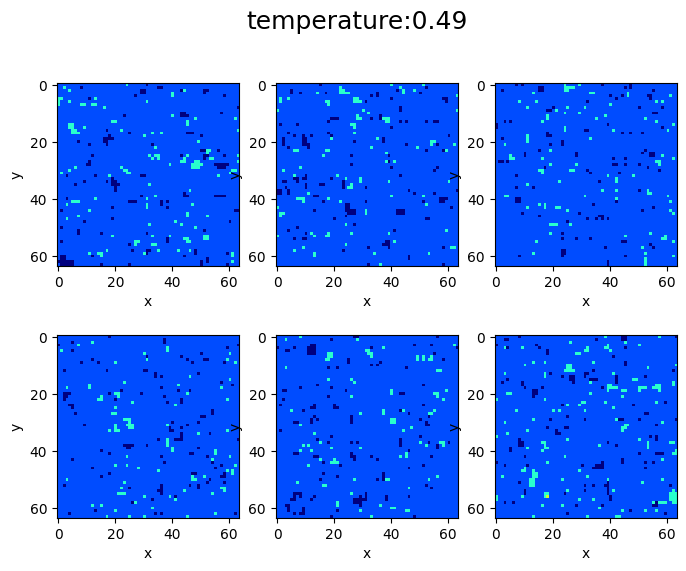

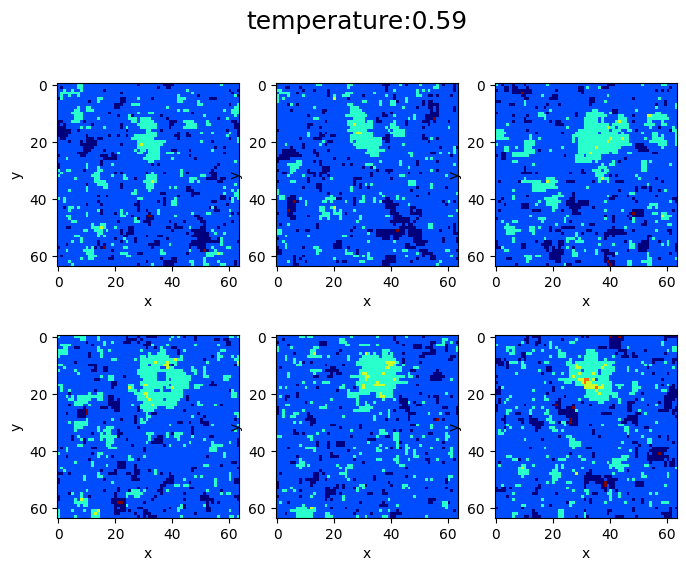

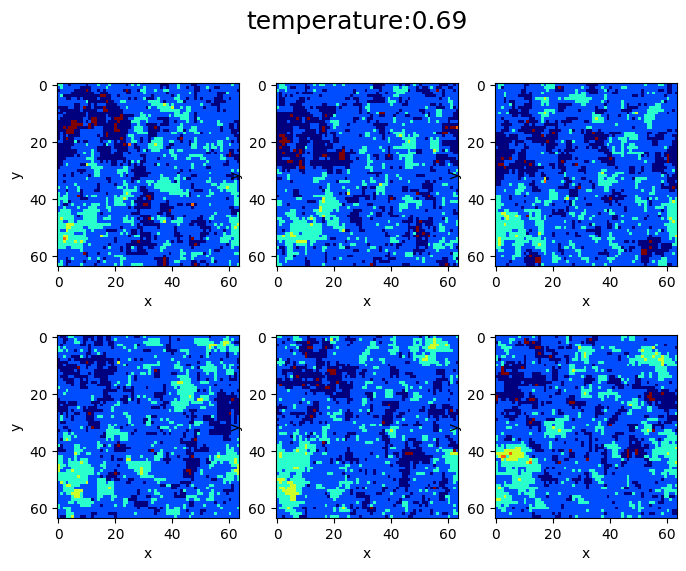

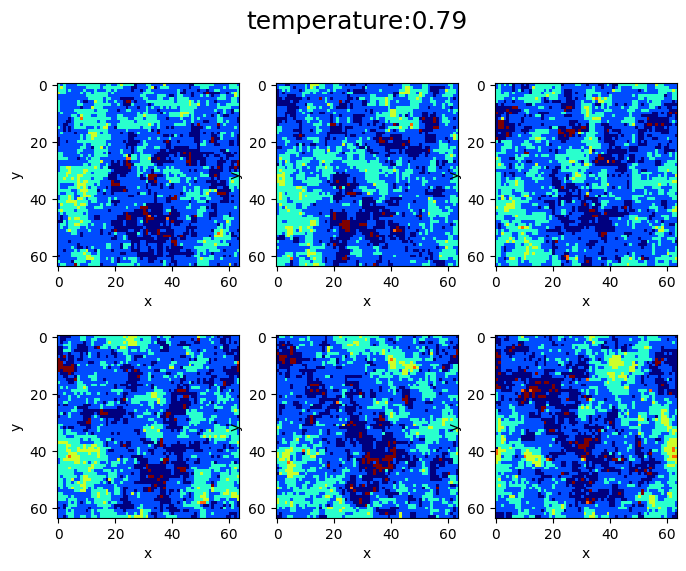

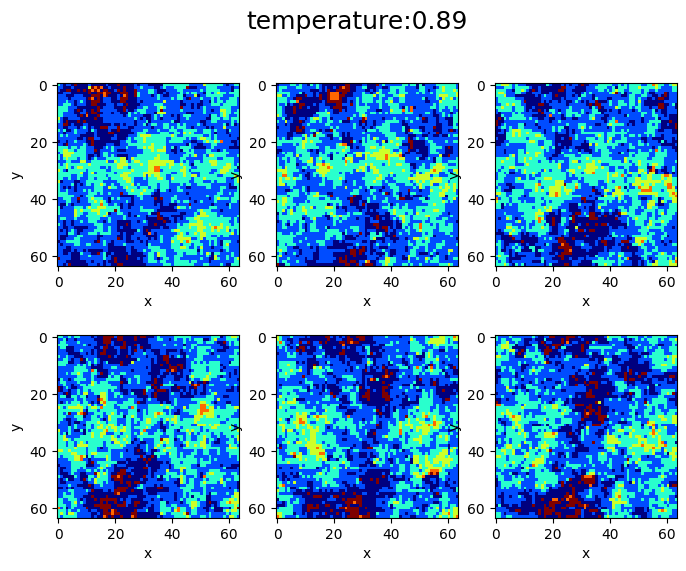

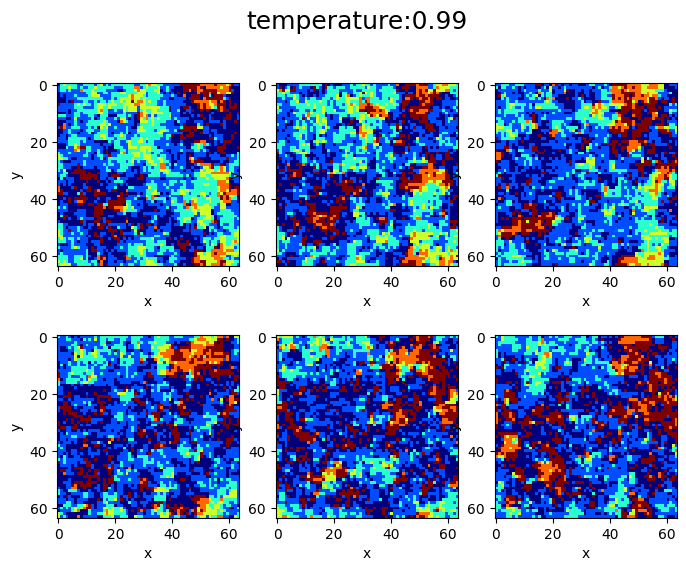

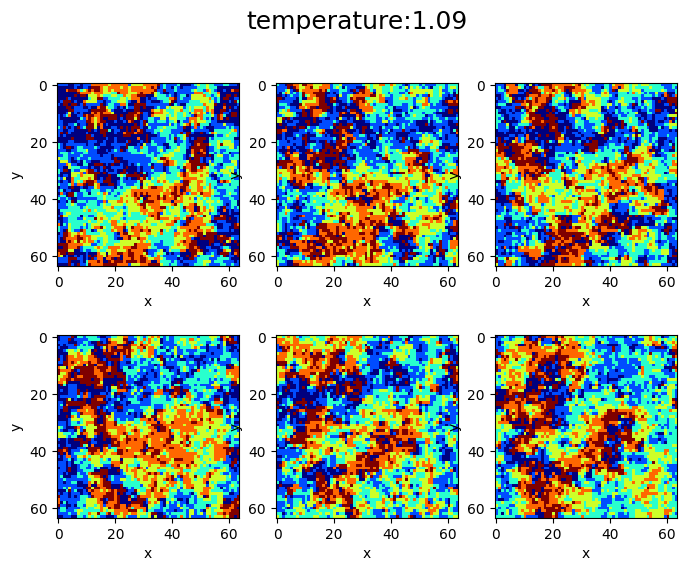

In [3]:
# 可視化
row = 2  # 行数
col = 3  # 列数

for num in range(9, 79, 10):
    fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(8, 6))
    fig.suptitle(f"temperature:{prm_list[num][0]}", fontsize=18, color='black')
    for iconf in range(6):
        _r = iconf//col
        _c = iconf % col
        file = f"{prm_list[num][1]}{iconf}.npy"
        sc = np.load(file)

        ax[_r,_c].set_xlabel('x')
        ax[_r,_c].set_ylabel('y')
        ax[_r,_c].imshow(sc, interpolation='nearest', vmin=0, vmax=Q-1, cmap='jet')

In [4]:
dataset, _ = create_train_data_CV(prm_list=prm_list, ndata=ndata, T_cr_1=T_cr_1, T_cr_2=T_cr_2, exclude_T=exclude_T, total_label=3)
_, _, test_dataset = create_train_data_hold_out(
        prm_list=prm_list, 
        ndata=ndata, 
        T_cr_1=T_cr_1, 
        T_cr_2=T_cr_2, 
        exclude_T=exclude_T, 
        total_label=3
    )
BATCH_SIZE = 512
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
print("dataset.shape = ", len(dataset))
print("test_dataset.shape = ", len(test_dataset))

dataset.shape =  28500
test_dataset.shape =  8100


In [5]:
class CNNClassifier(nn.Module):
    def __init__(self, target_size):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, 1)
        self.conv2 = nn.Conv2d(64, 128, 3, 1)
        # self.conv3 = nn.Conv2d(128, 256, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(29*29*128, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, target_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = nn.MaxPool2d(2)(x)
        x = self.dropout1(x)
        x = self.relu(self.conv2(x))
        # print(x.shape)
        # x = nn.MaxPool2d(2)(x)
        # x = self.relu(self.conv3(x))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        # x = self.dropout2(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        return x

mps is available.
FOLD 1
--------------------------------
Epoch: 20, Validation loss: 0.00016220618758285254, Accuracy: 98.42105263157895%
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.9992    0.9996      1267
           1     0.8984    0.9796    0.9372       343
           2     0.9942    0.9702    0.9820      1240

    accuracy                         0.9842      2850
   macro avg     0.9642    0.9830    0.9730      2850
weighted avg     0.9853    0.9842    0.9845      2850



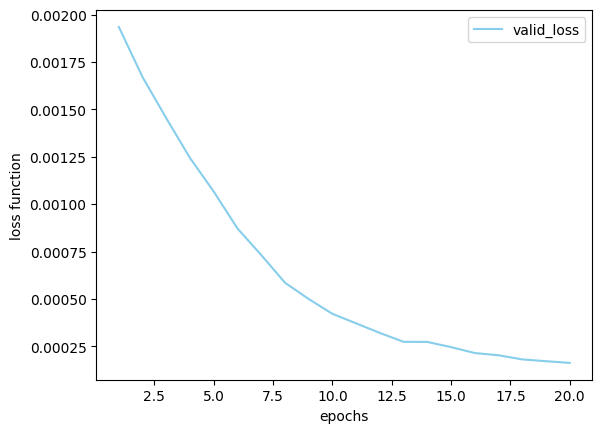

FOLD 2
--------------------------------
Epoch: 20, Validation loss: 0.0003460688941311418, Accuracy: 98.59649122807018%
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1209
           1     0.9934    0.8882    0.9379       340
           2     0.9716    0.9985    0.9848      1301

    accuracy                         0.9860      2850
   macro avg     0.9883    0.9622    0.9742      2850
weighted avg     0.9862    0.9860    0.9857      2850



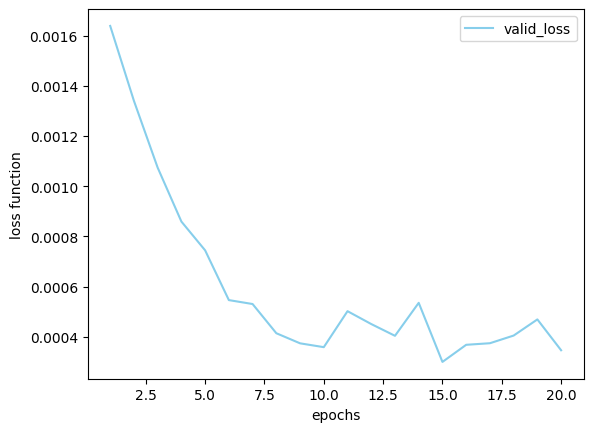

FOLD 3
--------------------------------
Epoch: 20, Validation loss: 0.0005099300125188995, Accuracy: 97.9298245614035%
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1262
           1     1.0000    0.8285    0.9062       344
           2     0.9547    1.0000    0.9768      1244

    accuracy                         0.9793      2850
   macro avg     0.9849    0.9428    0.9610      2850
weighted avg     0.9802    0.9793    0.9786      2850



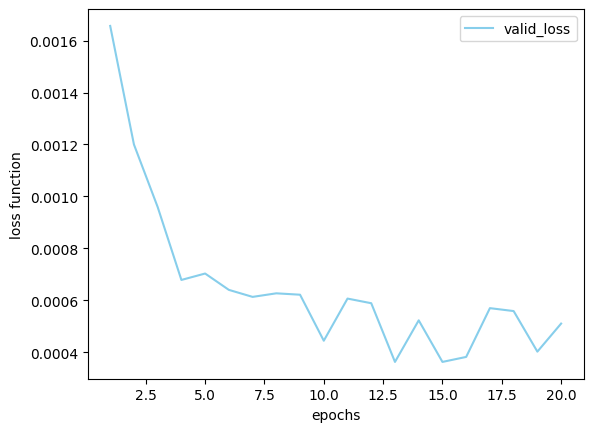

FOLD 4
--------------------------------
Epoch: 20, Validation loss: 0.00032905043740021555, Accuracy: 98.7719298245614%
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1248
           1     0.9604    0.9347    0.9474       337
           2     0.9827    0.9897    0.9862      1265

    accuracy                         0.9877      2850
   macro avg     0.9810    0.9748    0.9779      2850
weighted avg     0.9876    0.9877    0.9877      2850



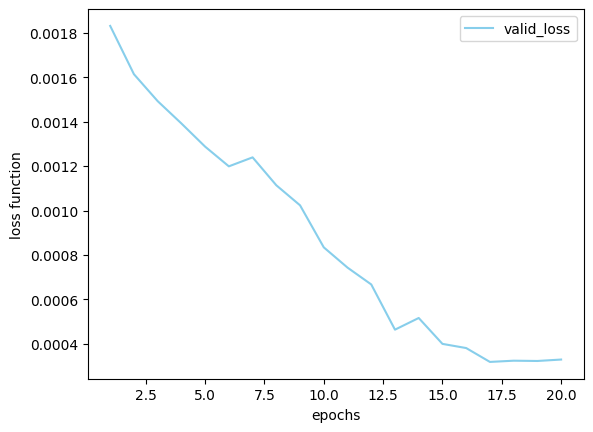

FOLD 5
--------------------------------
Epoch: 20, Validation loss: 0.0004846496174209996, Accuracy: 98.03508771929825%
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1263
           1     0.9938    0.8552    0.9193       373
           2     0.9573    0.9984    0.9774      1214

    accuracy                         0.9804      2850
   macro avg     0.9837    0.9512    0.9656      2850
weighted avg     0.9810    0.9804    0.9798      2850



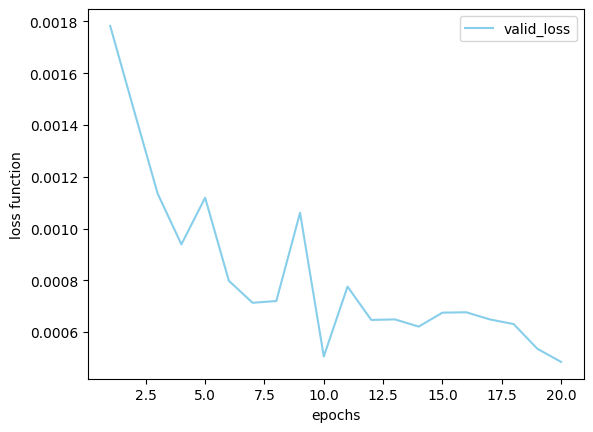

FOLD 6
--------------------------------
Epoch: 20, Validation loss: 0.0003837896700490985, Accuracy: 98.35087719298245%
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1247
           1     1.0000    0.8669    0.9287       353
           2     0.9638    1.0000    0.9815      1250

    accuracy                         0.9835      2850
   macro avg     0.9879    0.9556    0.9701      2850
weighted avg     0.9841    0.9835    0.9831      2850



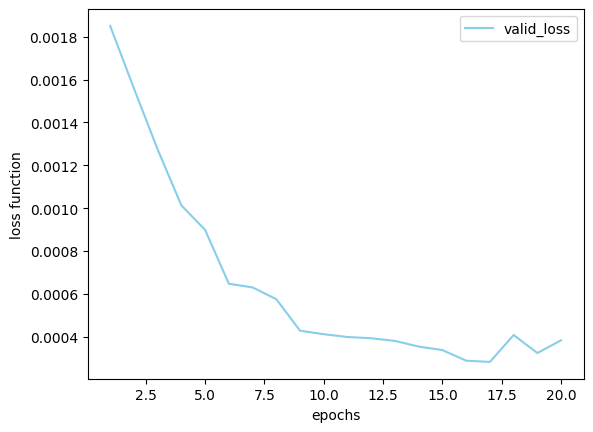

FOLD 7
--------------------------------
Epoch: 20, Validation loss: 0.00039567025084244576, Accuracy: 97.9298245614035%
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.9992    0.9996      1229
           1     0.9969    0.8474    0.9161       380
           2     0.9554    1.0000    0.9772      1241

    accuracy                         0.9793      2850
   macro avg     0.9841    0.9489    0.9643      2850
weighted avg     0.9801    0.9793    0.9787      2850



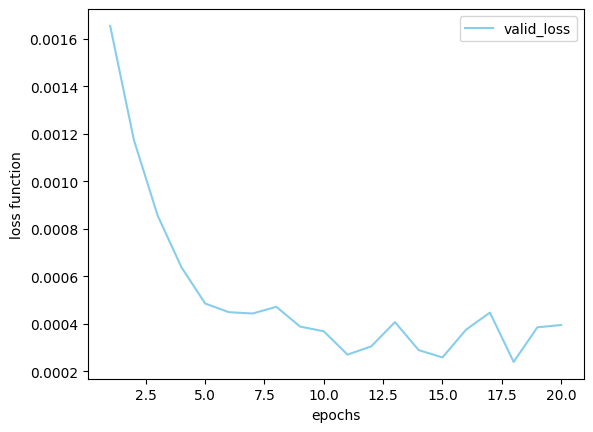

FOLD 8
--------------------------------
Epoch: 20, Validation loss: 0.0002103250173100254, Accuracy: 98.59649122807018%
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1258
           1     0.9303    0.9475    0.9388       324
           2     0.9865    0.9819    0.9842      1268

    accuracy                         0.9860      2850
   macro avg     0.9723    0.9765    0.9743      2850
weighted avg     0.9861    0.9860    0.9860      2850



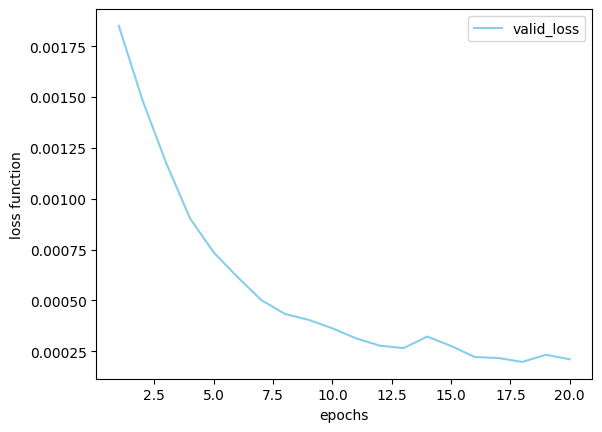

FOLD 9
--------------------------------
Epoch: 20, Validation loss: 0.0003388265664117378, Accuracy: 98.3859649122807%
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1238
           1     0.9592    0.9027    0.9301       339
           2     0.9745    0.9898    0.9821      1273

    accuracy                         0.9839      2850
   macro avg     0.9779    0.9641    0.9707      2850
weighted avg     0.9838    0.9839    0.9837      2850



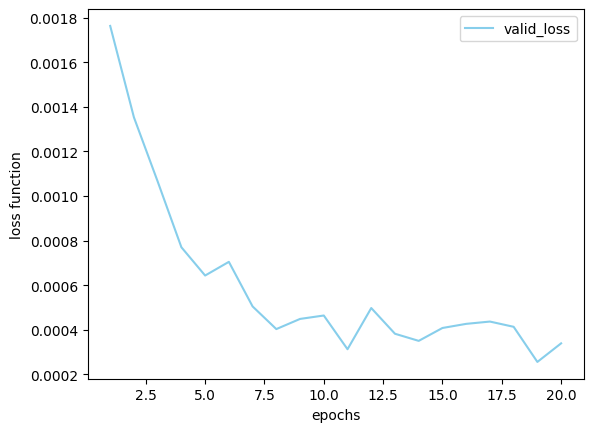

FOLD 10
--------------------------------
Epoch: 20, Validation loss: 0.0003274531348755485, Accuracy: 98.45614035087719%
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1279
           1     0.9681    0.9101    0.9382       367
           2     0.9731    0.9909    0.9819      1204

    accuracy                         0.9846      2850
   macro avg     0.9804    0.9670    0.9734      2850
weighted avg     0.9845    0.9846    0.9844      2850



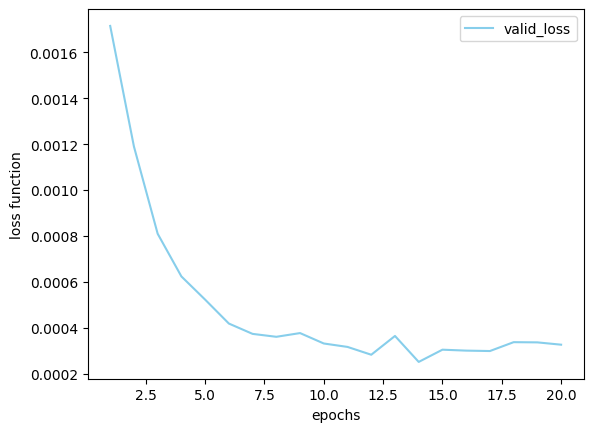

K-FOLD CROSS VALIDATION RESULTS FOR 10 FOLDS
Done.


In [6]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
if torch.backends.mps.is_available():
    print("mps is available.")

# hyper parameter
LEARNING_RATE = 0.00001
target_size = 3
grad_clip = 0.1
norm_type = 2
epochs = 20
k_folds = 10
kfold = KFold(n_splits=k_folds, shuffle=True)

y1s_mean, y2s_mean, y3s_mean = np.empty(nconf), np.empty(nconf), np.empty(nconf)
for fold, (train_data, valid_data) in enumerate(kfold.split(dataset)):
    print(f'FOLD {fold+1}')
    print('--------------------------------')
    train_subsampler = SubsetRandomSampler(train_data)
    valid_subsampler = SubsetRandomSampler(valid_data)

    train_loader = DataLoader(
        dataset, batch_size=BATCH_SIZE, sampler=train_subsampler)
    valid_loader = DataLoader(
        dataset, batch_size=BATCH_SIZE, sampler=valid_subsampler)
    weights = torch.tensor([1.0, 4.0, 1.0]).to(device)

    model = CNNClassifier(target_size).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    train_loss_list, vaild_loss_list, accuracy_list = [], [], []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for data, _, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target.type(torch.long))
            train_loss += loss.item()
            loss.backward()
            del loss
            nn.utils.clip_grad_norm_(
                parameters=model.parameters(), max_norm=grad_clip, norm_type=norm_type)
            optimizer.step()
        # train_loss_list.append(train_loss)

        model.eval()
        with torch.no_grad():
            valid_loss = 0
            correct = 0
            answer, prediction = [], []
            for data, _, target in valid_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                valid_loss += criterion(output, target.type(torch.long)).item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()
                prediction += list(pred.cpu().numpy())
                answer += list(target.cpu().numpy())
            answer_test, prediction_test, temps = [], [], []
            for data, temp, target in test_loader:
                data = data.to(device)
                output = model(data)
                pred = output.argmax(dim=1, keepdim=False)
                prediction_test += list(pred.cpu().numpy())
                answer_test += list(target.cpu().numpy())
                temps += list(temp.cpu().numpy())
            xs, y1s, y2s, y3s = inference(len(test_dataset), temps, prediction_test)
            y1s_mean += y1s
            y2s_mean += y2s
            y3s_mean += y3s

        valid_loss /= len(valid_loader.sampler.indices)
        accuracy = 100 * correct / len(valid_loader.sampler.indices)
        y1s_mean /= k_folds
        y2s_mean /= k_folds
        y3s_mean /= k_folds

        vaild_loss_list.append(valid_loss)
        accuracy_list.append(accuracy)
        if epoch == epochs - 1:
            print(f'Epoch: {epoch+1}, Validation loss: {valid_loss}, Accuracy: {accuracy}%')
            print("Classification Report:\n", classification_report(answer, prediction, digits=4))
    plt.xlabel('epochs')
    plt.ylabel('loss function')
    # plt.plot(np.arange(1, epochs+1), train_loss_list, label="train_loss", color="orange")
    plt.plot(np.arange(1, epochs+1), vaild_loss_list,
             label="valid_loss", color="skyblue")
    plt.legend()
    plt.show()
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print("Done.")
# torch.save(model, "2d_Clock_q=6_model_classifier.pth")

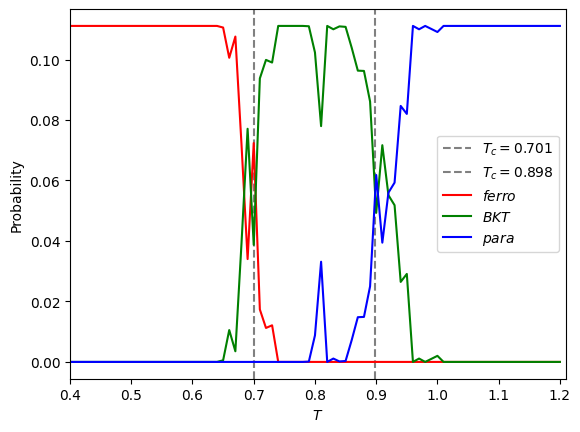

In [7]:
plt.axvline(x=T_cr_1, ymin=0, ymax=1, ls="dashed",
            color="gray", label=r"$T_c={}$".format(T_cr_1))
plt.axvline(x=T_cr_2, ymin=0, ymax=1, ls="dashed",
            color="gray", label=r"$T_c={}$".format(T_cr_2))
plt.xlim(t_start, t_end)
plt.plot(xs, y1s_mean, label=r"$ferro$", color="red")
plt.plot(xs, y2s_mean, label=r"$BKT$", color="green")
plt.plot(xs, y3s_mean, label=r"$para$", color="blue")
plt.legend()
plt.xlabel(r"$T$")
plt.ylabel(r"Probability")
plt.show()